In [190]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [191]:
user=pd.read_json("logins.json")

In [192]:
user_resampled=user.resample('15Min', on='login_time',loffset='15Min').count()

In [193]:
user_resampled = user_resampled.rename(columns={'login_time': 'counter'})

In [194]:
user_resampled=user_resampled.reset_index()

In [195]:
user_resampled['login_time'] = user_resampled['login_time'].astype(str).str[-8:]

In [196]:
user_resampled=user_resampled.reset_index()

In [205]:
time_log_count=user_resampled.groupby(by='login_time').agg('sum').drop('index',axis=1)

In [214]:
time_log_count.head()

,counter
login_time,
00:00:00,1477
00:15:00,1439
00:30:00,1547
00:45:00,1525
01:00:00,1482


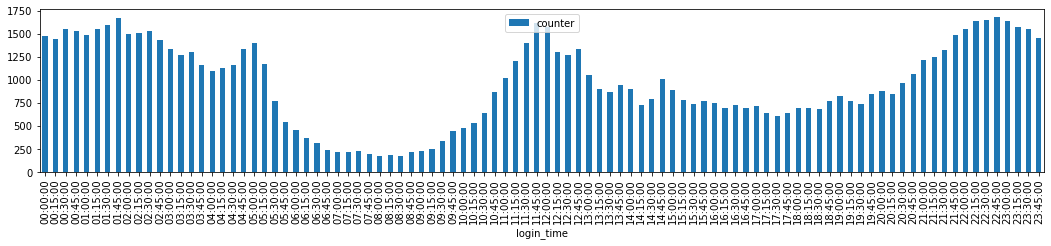

In [213]:
time_log_count.plot(kind='bar',figsize=(18,3))

#### Summary :   Patterns of demand appear to cycle through higher counts after 9:00 pm until 2:00 AM. The demand hits the lowest of the days cycle between 5:00 pm and 9 pm. 